Project Topic
Is there a clear explanation of what this project
is about? Does it state clearly which type of
problem? E.g. classification or regression


# A Logistic Regression Analysis using the US Adult Income Dataset
### By Brittany Bilotti

In [10]:
import os

# Current directory
print("Current Directory:", os.getcwd())

# Change directory
new_directory = "../../Project/"
os.chdir(new_directory)

# Updated directory
print("Updated Directory:", os.getcwd())

Current Directory: /home/jovyan/3022/Project


FileNotFoundError: [Errno 2] No such file or directory: '../../Project/'

## Project Topic 

It is important to study the relationship between adult income and certain attributes in order to provide valuable insights as to what may influence income levels. Not only can this be useful in predicting the factors that contribute to an individual's income level, but it can provide helpful insight to government agencies, financial institutions and individual private companies on better governmental policy-making, workforce planning, and marketing to individual's within a certain income bracket.

<br> 
This project involves predicting the income levels of adults using logistic regression. The dataset used for this will be the US Adult Income Dataset and it contains 15 numerical and categorical attributes some of which are age, education, occupation, marital status, and more.
<br>

###  Goals:
On the basis of the training data, I would like to:
<br>
* Develop a logistic regression model that can accurately predict whether an adult's income level will be above a certain threshold (undecided as of yet) based on certain attributes 
* Find important predictors by analyzing the dataset in order to identify the attributes that have a significant impact on an individual's income level
* Assess the quality of the logistic regression model's performance 
* Interpret the results to find meaningful conclusions about the data
* Discover any biases or limitations of the logistic regression model
<br>
<br>


In [12]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
# sns.set() sets the color map to have a light blue background
import seaborn as sns; sns.set()
import patsy
import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2 
from sklearn import linear_model
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV
import sklearn.neighbors as neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import svm
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_predict
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Data Source and Description
This project uses the US Adult Income Dataset dataset from the UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/2/adult
This dataset contains information about individuals from the 1994 United States Census that represents a subset of the larger census data and is in the form of a CSV file with 14 predictors and 1 output variable (income level). The data is anonymized and does not include personally identifiable information.

In [13]:
# load in the dataset from the UCI Machine Learning Repository
# https://archive.ics.uci.edu/dataset/2/adult
# missing values have been marked with question marks, fill those in this step
income_df = pd.read_csv('adult.data', header=None, na_values=['?'])
income_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
# get a sense of the factor data types 
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Factors
The dataset consists of a mix of categorical attributes (workclass, education, occupation) and numerical attributes (age, hours per week, capital gain/loss). It contains 32561 total data objects and 14 predictors so both n and p are relatively large.
<br>
 
Listed below are columns
<br>
* Age: Continuous numerical attribute representing the age of an individual <br>
* Workclass: Categorical attribute indicating the type of work class <br>
* Final Weight: Continuous numerical attribute representing the exact income <br>
* Education: Categorical attribute indicating the highest level of education completed by an individual <br>
* Education-Num: Continuous numerical attribute representing the numerical encoding of education levels <br>
* Marital Status: Categorical attribute indicating the marital status <br>
* Occupation: Categorical attribute indicating the occupation <br>
* Relationship: Categorical attribute indicating the relationship status of an individual <br>
* Race: Categorical attribute indicating the race of an individual <br>
* Sex: Categorical attribute indicating the gender of an individual <br>
* Capital Gain: Continuous numerical attribute representing the capital gains <br>
* Capital Loss: Continuous numerical attribute representing the capital losses <br>
* Hours per Week: Continuous numerical attribute representing the number of hours worked per week <br>
* Native Country: Categorical attribute indicating the native country of an individual <br>
* Income: Categorical attribute indicating whether an individual's income is above or below $50,000 annually <br>

## Exploration of Data Values and Data Types

In [15]:
# this column is likely 'Age'
income_df[0].head()

0    39
1    50
2    38
3    53
4    28
Name: 0, dtype: int64

In [16]:
# this column is likely 'Workclass'
income_df[1].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [17]:
# this column is likely 'Final Weight (exact income)'
income_df[2].head()

0     77516
1     83311
2    215646
3    234721
4    338409
Name: 2, dtype: int64

In [18]:
# this column is likely 'Education'
income_df[3].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [19]:
# this column is likely 'Education-Number'
income_df[4].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8])

In [20]:
# this column is likely 'Marital Status'
income_df[5].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [21]:
# this column is likely 'Occupation'
income_df[6].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [22]:
# this column is likely 'Relationship'
income_df[7].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [23]:
# this column is likely 'Race'
income_df[8].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [24]:
# this column is likely 'Gender'
income_df[9].unique()

array([' Male', ' Female'], dtype=object)

In [25]:
# this column is likely 'Capital Gain'
income_df[10].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060])

In [26]:
# this column is likely 'Capital Loss'
income_df[11].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411])

In [27]:
# this column is likely 'Hours Worked (per week)'
income_df[12].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95])

In [28]:
# this column is likely 'Native Country'
income_df[13].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [29]:
# this column is likely 'Income (above or below 50)'
income_df[14].unique()

array([' <=50K', ' >50K'], dtype=object)

## Data Cleaning and Exploratory Data Analysis 

In [30]:
# set headers based on probable attribute names 
header = {0:'Age', 1:'Workclass', 2:'Exact Income', 3:'Education', 4:'Education-Num', 
          5:'Marital Status', 6:'Occupation', 7:'Relationship',
          8:'Race', 9:'Sex', 10:'Capital Gain',
          11:'Capital Loss', 12:'Hours per Week', 13:'Native Country', 
          14: 'Income'}

In [31]:
# Rename the dataframe's column values with the header variable
income_df = income_df.rename(columns = header)

In [32]:
income_df.head()

,Age,Workclass,Exact Income,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [33]:
#dropping columns Capital Gain and Capital Loss as this data is not relevant to the problem
columns_to_drop =['Capital Gain', 'Capital Loss']
income_df = income_df.drop(columns=columns_to_drop, axis= 1)
income_df.head()

,Age,Workclass,Exact Income,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [34]:
#checking to see for null values
null_values = income_df.isnull().sum()
#no null values so no need to fill with median
print(null_values)

Age               0
Workclass         0
Exact Income      0
Education         0
Education-Num     0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours per Week    0
Native Country    0
Income            0
dtype: int64


## Basic Statistics of the Data

In [35]:
# basic statistical descriptions of the data 
income_df.describe()

,Age,Exact Income,Education-Num,Hours per Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,40.437456
std,13.640433,1.055500e+05,2.572720,12.347429
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


## Numeric Factors
For each numeric factor, use a box-plot, scatter plot, histogram, or KDE plot to describe the distribution of the data as appropriate.

In [36]:
numeric_cols = ['Age', 'Exact Income', 'Education-Num', 
               'Hours per Week']

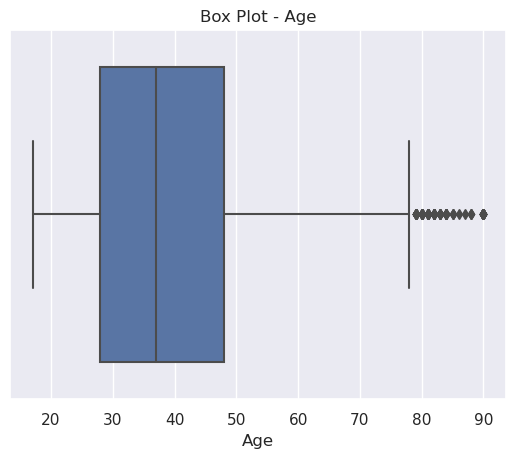

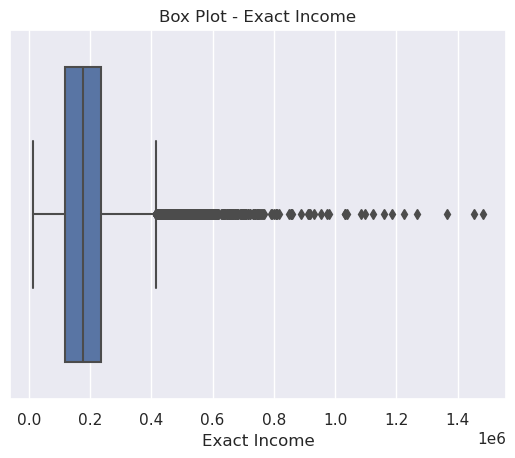

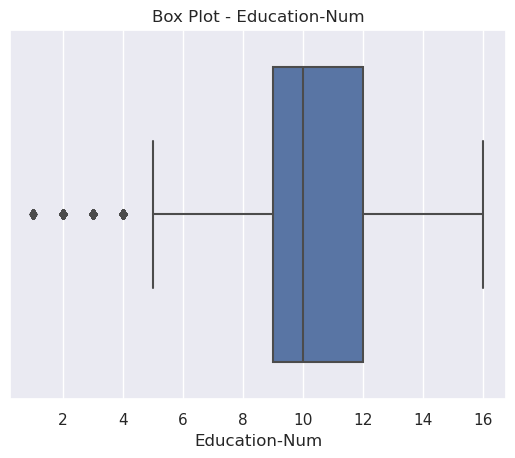

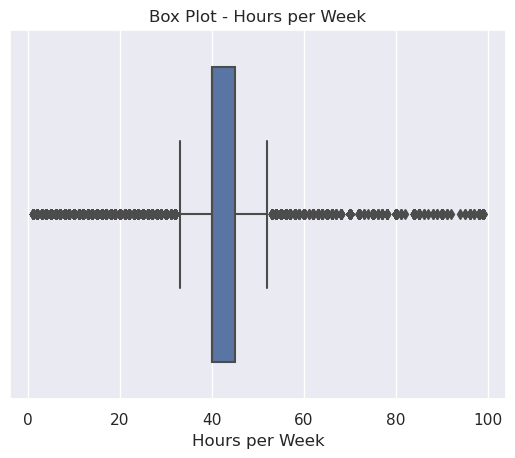

In [37]:
# Create box plots for each numeric column
for col in numeric_cols:
    sns.boxplot(x=col, data=income_df)
    plt.title(f'Box Plot - {col}')
    plt.show()


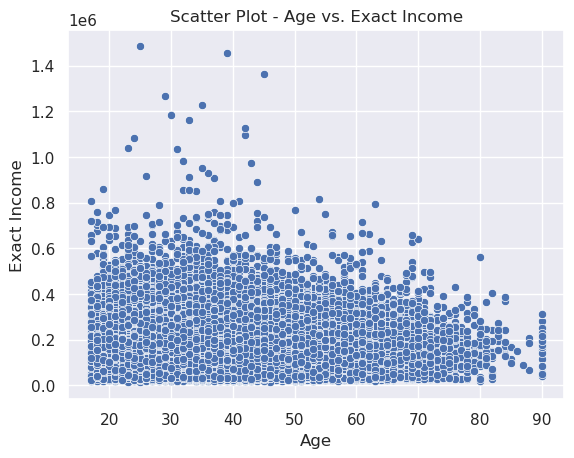

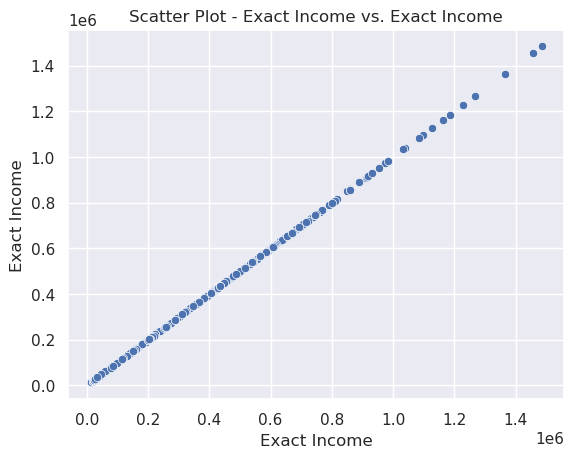

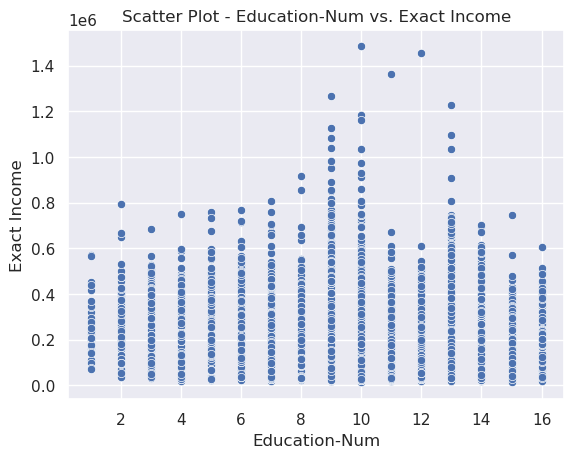

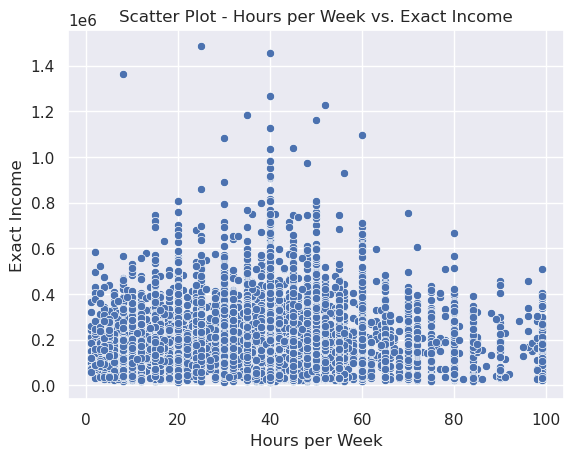

In [38]:
# Create scatter plots for each numeric column
for col in numeric_cols:
    sns.scatterplot(x=col, y='Exact Income', data=income_df)
    plt.title(f'Scatter Plot - {col} vs. Exact Income')
    plt.show()



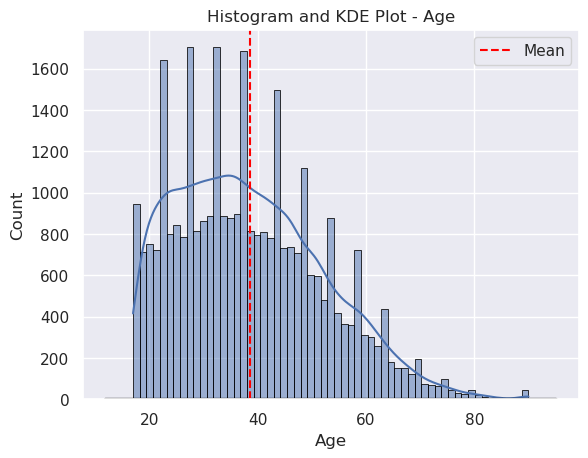

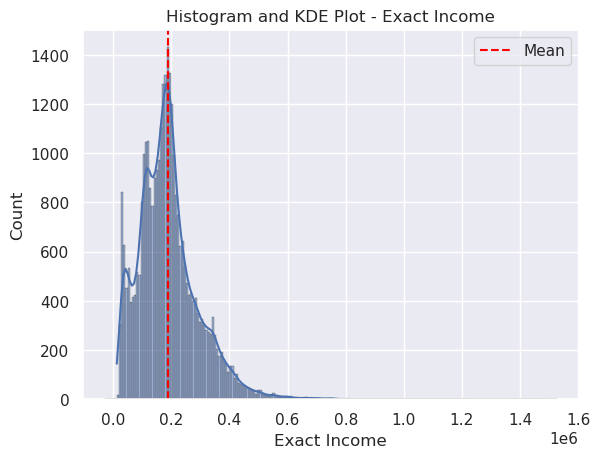

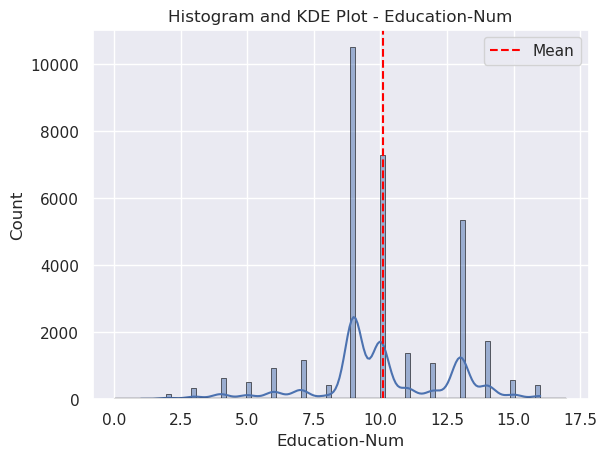

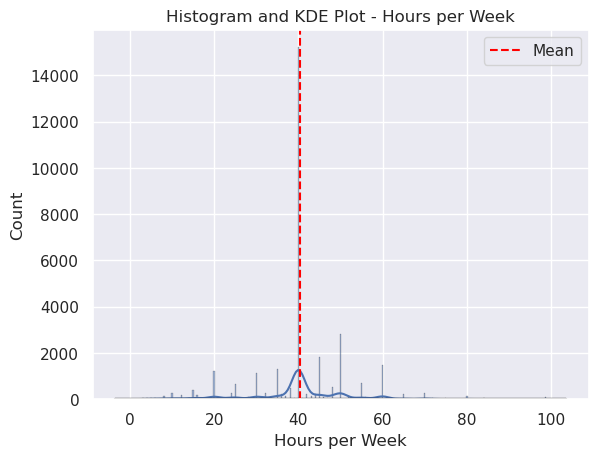

In [43]:
# histogram with kde overlay
for col in numeric_cols:
    fig, ax = plt.subplots()

    # Histogram
    sns.histplot(x=col, data=income_df, kde=True, ax=ax, edgecolor='black')
    ax.set_title(f'Histogram and KDE Plot - {col}')

    # KDE plot
    sns.kdeplot(x=col, data=income_df, ax=ax, color='black', linewidth=2)

    # mean
    mean_value = income_df[col].mean()
    ax.axvline(mean_value, color='red', linestyle='--', label='Mean')
    ax.legend()

    plt.show()